In [ ]:
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
df = pd.read_csv("fraudDataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,accage,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,5.895247,0,Current,3/1/2018,Morning,0.0
1,1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,2.705920,0,Savings,5/1/2018,Morning,0.0
2,2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,5.710513,0,Current,7/1/2018,Morning,1.0
3,3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,6.263347,0,Current,6/1/2018,Afternoon,1.0
4,4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,4.632230,0,Current,6/1/2018,Morning,0.0


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10127
Number of columns: 19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         10127 non-null  int64  
 1   Unnamed: 0           10127 non-null  int64  
 2   step                 10127 non-null  int64  
 3   type                 10123 non-null  object 
 4   branch               10127 non-null  object 
 5   amount               10125 non-null  float64
 6   nameOrig             10121 non-null  object 
 7   oldbalanceOrg        10125 non-null  float64
 8   newbalanceOrig       10127 non-null  float64
 9   nameDest             10121 non-null  object 
 10  oldbalanceDest       10126 non-null  float64
 11  newbalanceDest       10125 non-null  float64
 12  unusuallogin         10127 non-null  int64  
 13  accage               10121 non-null  float64
 14  isFlaggedFraud       10127 non-null  int64  
 15  Acct type            10117 non-null 

In [ ]:
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "step", "isFlaggedFraud"], inplace=True)

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)

In [ ]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,accage,isFraud
count,10125.00,10125.00,10127.00,10126.00,10125.00,10127.00,10121.00,10125.00
mean,104886.88,883696.53,904470.34,933539.30,1109314.85,10.51,4.52,0.01
std,270636.89,2124553.90,2169946.03,2677976.09,3048644.48,5.81,2.61,0.08
min,2.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4397.38,129.00,0.00,0.00,0.00,6.00,2.25,0.00
50%,12798.31,21363.00,10212.24,0.00,0.00,10.00,4.53,0.00
75%,114381.77,172432.00,170724.01,281934.51,252392.49,16.00,6.80,0.00
max,10000000.00,12900000.00,13000000.00,19500000.00,22600000.00,20.00,9.00,1.00


In [ ]:
df.describe(include="object")

,type,branch,nameOrig,nameDest,Acct type,Date of transaction,Time of day
count,10123,10127,10121,10121,10117,10120,10125
unique,5,135,10121,6495,2,14,3
top,PAYMENT,Estados Unidos,C1231006815,C985934102,Savings,6/1/2018,Afternoon
freq,5541,1283,1,62,6987,1446,3627


# Removing duplicates

In [ ]:
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 10127


# Null values

In [ ]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
accage                  6
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


type                   0
branch                 0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
unusuallogin           0
accage                 0
Acct type              0
Date of transaction    0
Time of day            0
isFraud                0
dtype: int64

In [ ]:
print("Number of rows:", df.shape[0])

Number of rows: 10082


# Unique values

In [ ]:
print("Number of unique values in each column:")
df.nunique()

Number of unique values in each column:


type                       5
branch                   134
amount                 10036
nameOrig               10082
oldbalanceOrg           7308
newbalanceOrig          5918
nameDest                6474
oldbalanceDest          4143
newbalanceDest          1508
unusuallogin              21
accage                 10082
Acct type                  2
Date of transaction       14
Time of day                3
isFraud                    2
dtype: int64

# Date

In [ ]:
df["Date of transaction"]

0        3/1/2018
1        5/1/2018
2        7/1/2018
3        6/1/2018
4        6/1/2018
           ...   
10122    3/1/2018
10123    5/1/2018
10124    7/1/2018
10125    6/1/2018
10126    2/1/2018
Name: Date of transaction, Length: 10082, dtype: object

In [ ]:
df['Date of transaction'] = pd.to_datetime(df['Date of transaction'], dayfirst=True)

df['year'] = df['Date of transaction'].dt.year
df['month'] = df['Date of transaction'].dt.month
df['date'] = df['Date of transaction'].dt.day

index_of_isFraud = df.columns.get_loc('isFraud')
df.insert(index_of_isFraud, 'year', df.pop('year'))
df.insert(index_of_isFraud, 'month', df.pop('month'))
df.insert(index_of_isFraud, 'date', df.pop('date'))

df.drop(columns=["Date of transaction"], inplace=True)

In [ ]:
df.head()

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,accage,Acct type,Time of day,date,month,year,isFraud
0,PAYMENT,Indonesia,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,9,5.90,Current,Morning,3,1,2018,0.00
1,PAYMENT,India,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,10,2.71,Savings,Morning,5,1,2018,0.00
2,TRANSFER,India,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,2,5.71,Current,Morning,7,1,2018,1.00
3,CASH_OUT,Australia,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,6.26,Current,Afternoon,6,1,2018,1.00
4,PAYMENT,Australia,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,17,4.63,Current,Morning,6,1,2018,0.00


In [ ]:
df.nunique()

type                  5
branch              134
amount            10036
nameOrig          10082
oldbalanceOrg      7308
newbalanceOrig     5918
nameDest           6474
oldbalanceDest     4143
newbalanceDest     1508
unusuallogin         21
accage            10082
Acct type             2
Time of day           3
date                 14
month                 1
year                  1
isFraud               2
dtype: int64

In [ ]:
df.drop(columns=["year", "month"], inplace=True)

# Data Visualizations

In [ ]:
fraud_count = df["isFraud"].value_counts()
fraud_count

0.00    10014
1.00       68
Name: isFraud, dtype: int64

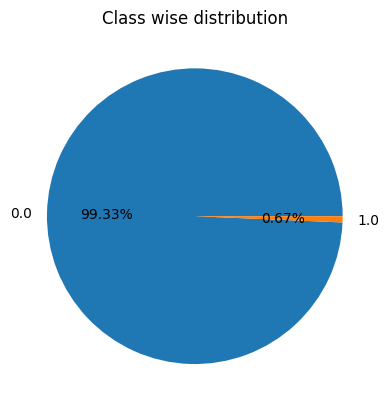

In [ ]:
plt.pie(fraud_count, labels=fraud_count.keys(), autopct="%.2f%%")
plt.title("Class wise distribution")
plt.show()

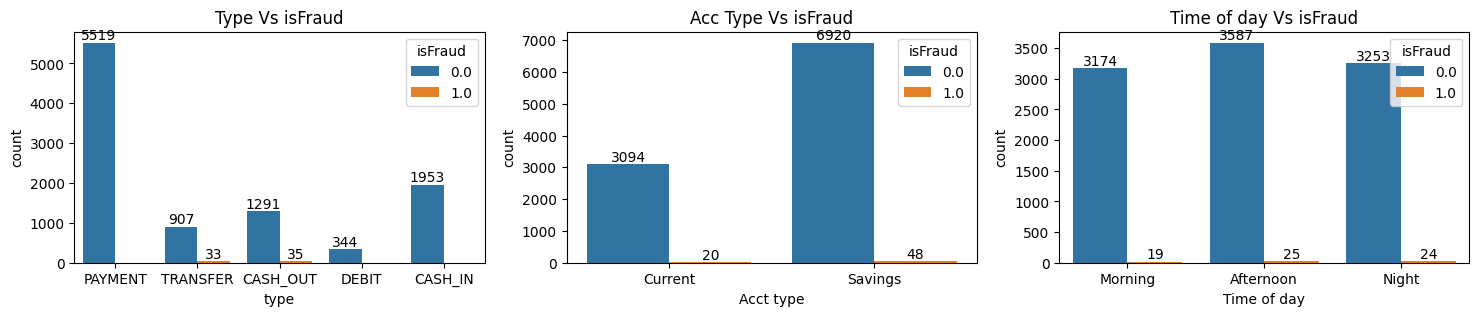

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(18,3))

ax = sns.countplot(data=df, x='type',hue='isFraud', ax=axes[0])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[0].set_title('Type Vs isFraud')

ax = sns.countplot(data=df, x='Acct type',hue='isFraud', ax=axes[1])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[1].set_title('Acc Type Vs isFraud')

ax = sns.countplot(data=df, x='Time of day',hue='isFraud', ax=axes[2])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[2].set_title('Time of day Vs isFraud')

plt.show()

Fraudulent transactions are of two types only, i.e., transfer and cash out

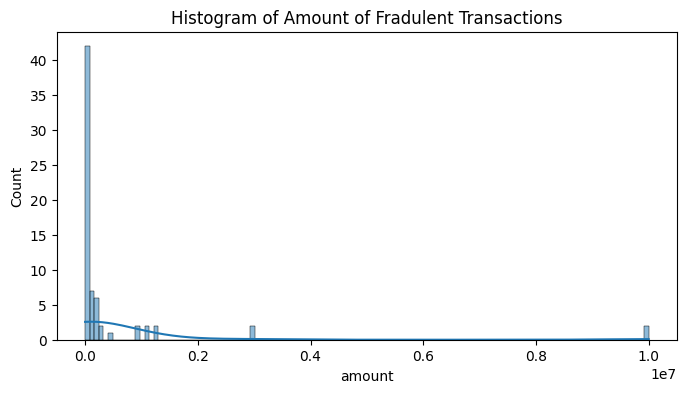

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df[df['isFraud']==1],x='amount',kde=True)
plt.title('Histogram of Amount of Fradulent Transactions')
plt.show()

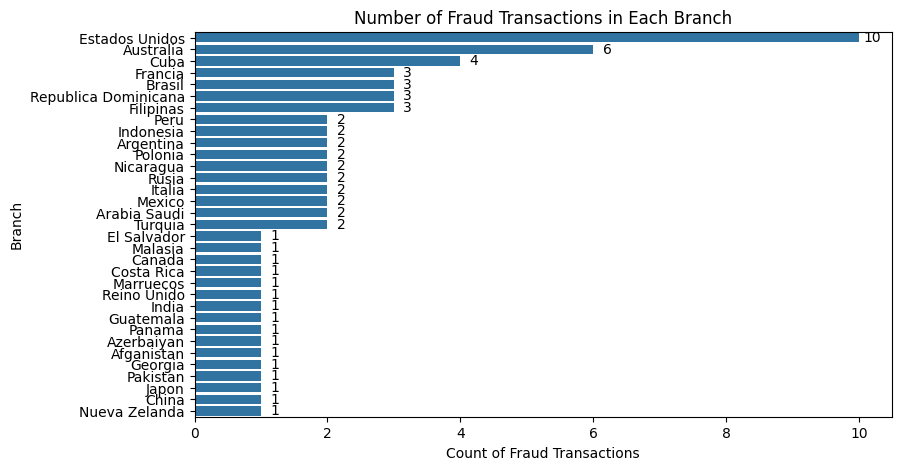

In [ ]:
branch_counts = df[df['isFraud'] == 1]['branch'].value_counts()
sorted_branches = branch_counts.index.tolist()

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df[df['isFraud'] == 1], y='branch', orient='horizontal', order=sorted_branches)
plt.title('Number of Fraud Transactions in Each Branch')
plt.xlabel('Count of Fraud Transactions')
plt.ylabel('Branch')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points')

plt.show()

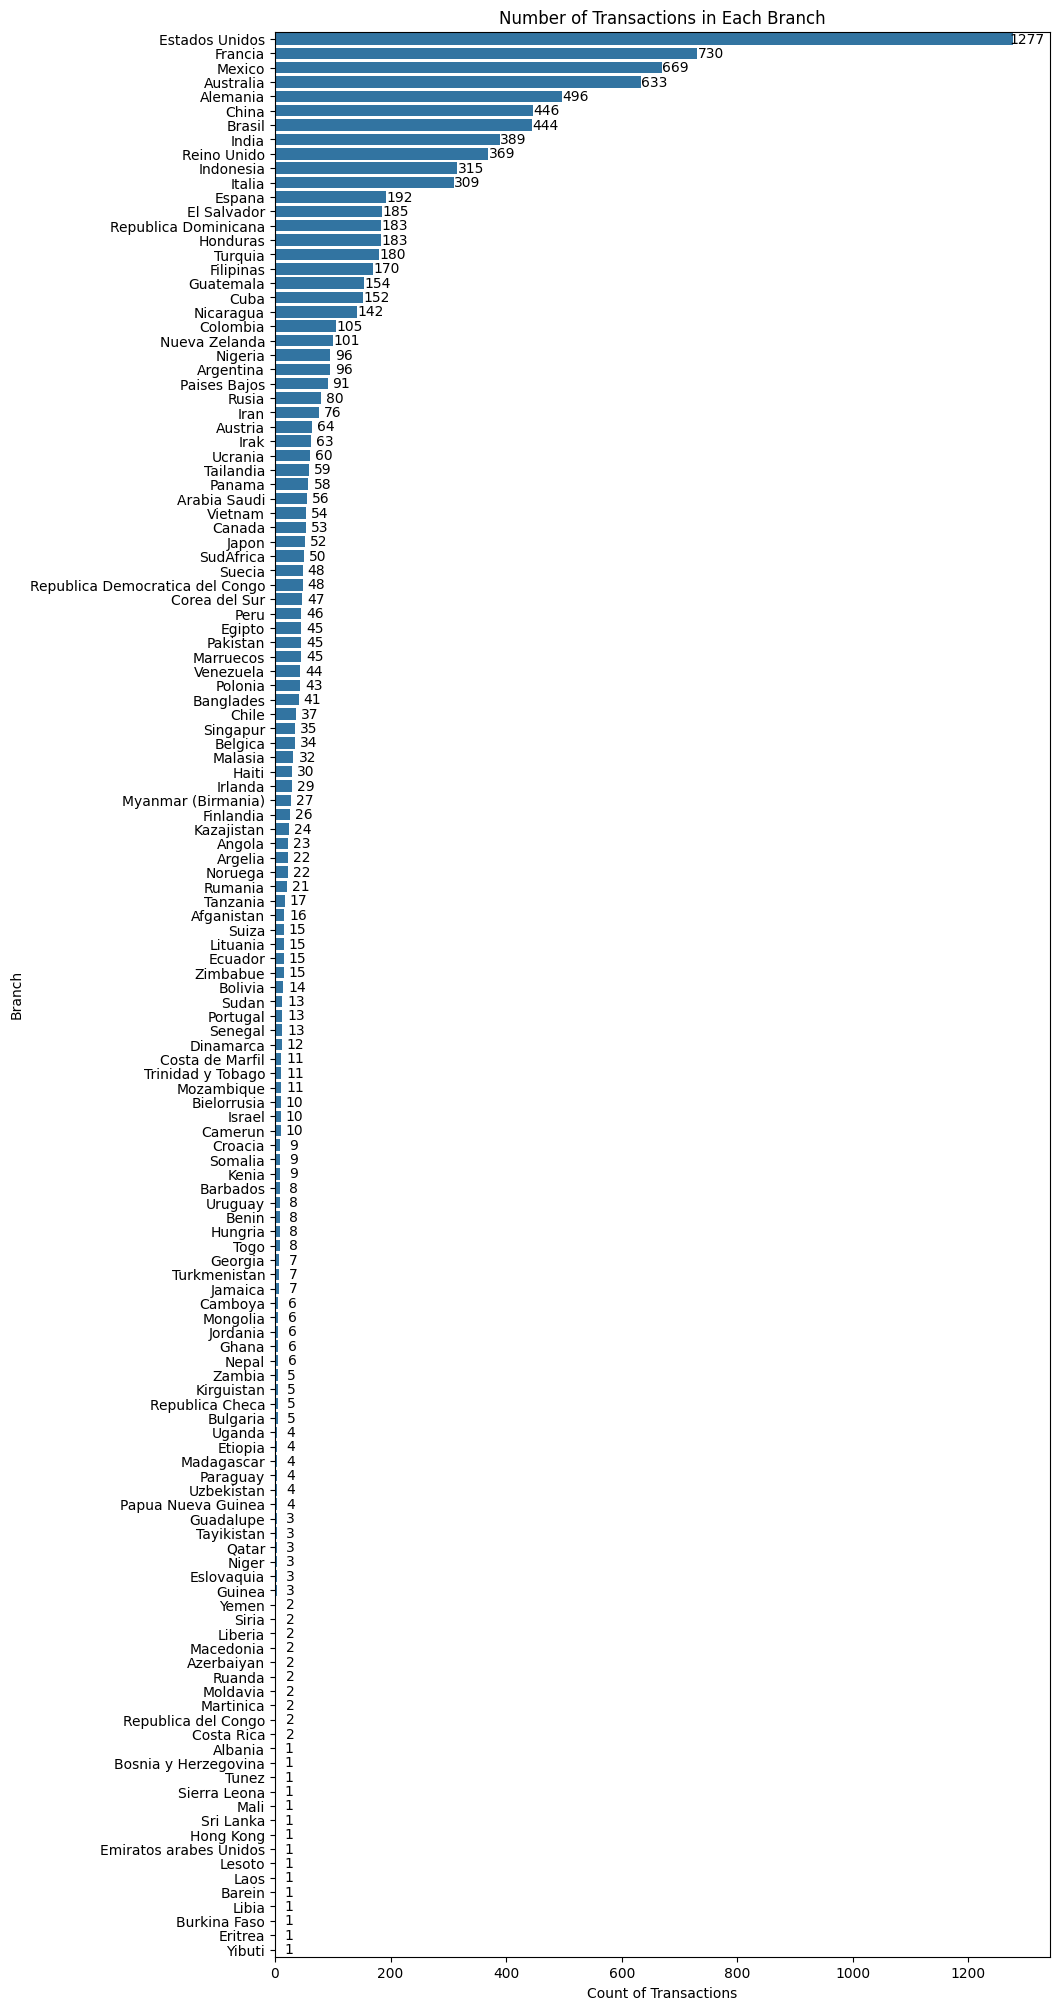

In [ ]:
branch_counts = df['branch'].value_counts()
sorted_branches = branch_counts.index.tolist()
plt.figure(figsize=(10, 25))
ax = sns.countplot(data=df, y='branch', orient='horizontal', order=sorted_branches)
plt.title('Number of Transactions in Each Branch')
plt.xlabel('Count of Transactions')
plt.ylabel('Branch')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points')

plt.show()

# Label encoding

In [ ]:
df_encoded = df.copy()

In [ ]:
encoder = {}
encoded_values = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df_encoded[i] = encoder[i].fit_transform(df[i])

type_mapping = dict(zip(encoder['type'].classes_, encoder['type'].transform(encoder['type'].classes_)))
acctype_mapping = dict(zip(encoder['Acct type'].classes_, encoder['Acct type'].transform(encoder['Acct type'].classes_)))
timeofday_mapping = dict(zip(encoder['Time of day'].classes_, encoder['Time of day'].transform(encoder['Time of day'].classes_)))
branch_mapping = dict(zip(encoder['branch'].classes_, encoder['branch'].transform(encoder['branch'].classes_)))

print("Encoded values for 'type' column:", type_mapping)
print("Encoded values for 'Acct type' column:", acctype_mapping)
print("Encoded values for 'Time of day' column:", timeofday_mapping)
print("Encoded values for 'branch' column:", branch_mapping)

Encoded values for 'type' column: {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}
Encoded values for 'Acct type' column: {'Current': 0, 'Savings': 1}
Encoded values for 'Time of day' column: {'Afternoon': 0, 'Morning': 1, 'Night': 2}
Encoded values for 'branch' column: {'Afganistan': 0, 'Albania': 1, 'Alemania': 2, 'Angola': 3, 'Arabia Saudi': 4, 'Argelia': 5, 'Argentina': 6, 'Australia': 7, 'Austria': 8, 'Azerbaiyan': 9, 'Banglades': 10, 'Barbados': 11, 'Barein': 12, 'Belgica': 13, 'Benin': 14, 'Bielorrusia': 15, 'Bolivia': 16, 'Bosnia y Herzegovina': 17, 'Brasil': 18, 'Bulgaria': 19, 'Burkina Faso': 20, 'Camboya': 21, 'Camerun': 22, 'Canada': 23, 'Chile': 24, 'China': 25, 'Colombia': 26, 'Corea del Sur': 27, 'Costa Rica': 28, 'Costa de Marfil': 29, 'Croacia': 30, 'Cuba': 31, 'Dinamarca': 32, 'Ecuador': 33, 'Egipto': 34, 'El Salvador': 35, 'Emiratos arabes Unidos': 36, 'Eritrea': 37, 'Eslovaquia': 38, 'Espana': 39, 'Estados Unidos': 40, 'Etiopia': 41, 'Filipinas

In [ ]:
df_encoded.head()

,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,accage,Acct type,Time of day,date,isFraud
0,3,55,9839.64,1169,170136.00,160296.36,3755,0.00,0.00,9,5.90,0,1,3,0.00
1,3,54,1864.28,3518,21249.00,19384.72,3958,0.00,0.00,10,2.71,1,1,5,0.00
2,4,54,181.00,1583,181.00,0.00,732,0.00,0.00,2,5.71,0,1,7,1.00
3,1,7,181.00,9245,181.00,0.00,636,21182.00,0.00,1,6.26,0,0,6,1.00
4,3,7,11668.14,5528,41554.00,29885.86,1594,0.00,0.00,17,4.63,0,1,6,0.00


# Correlations

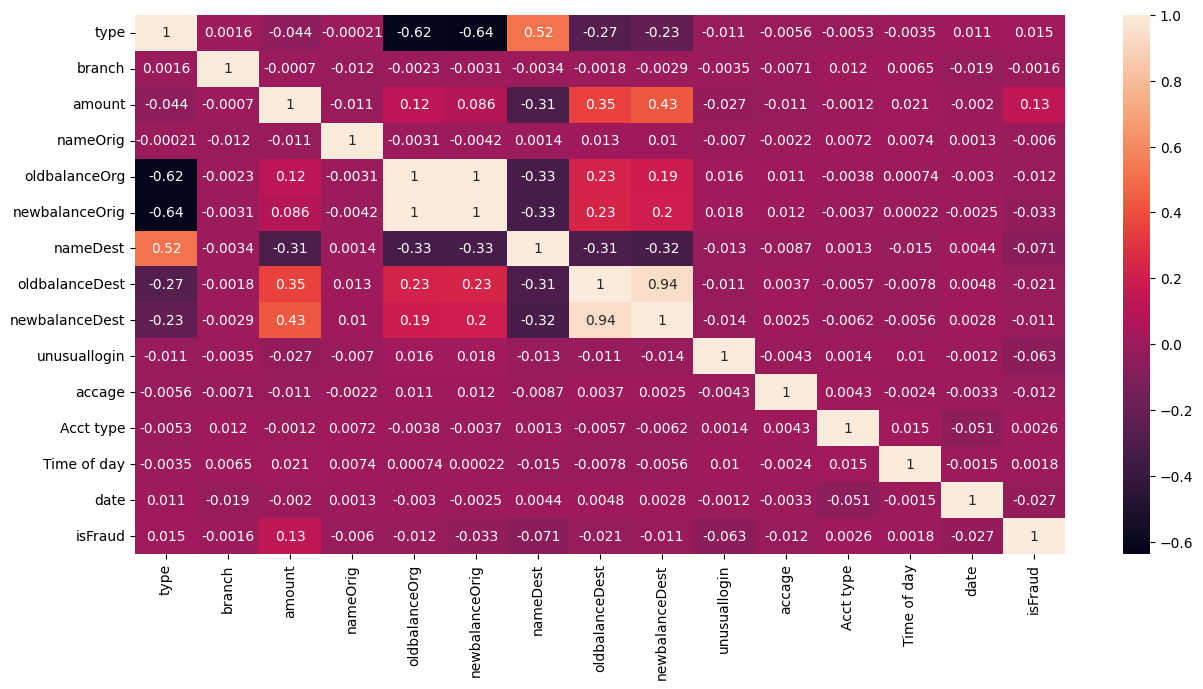

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

In [ ]:
df_encoded.drop(columns=["nameOrig", "nameDest"], inplace=True)

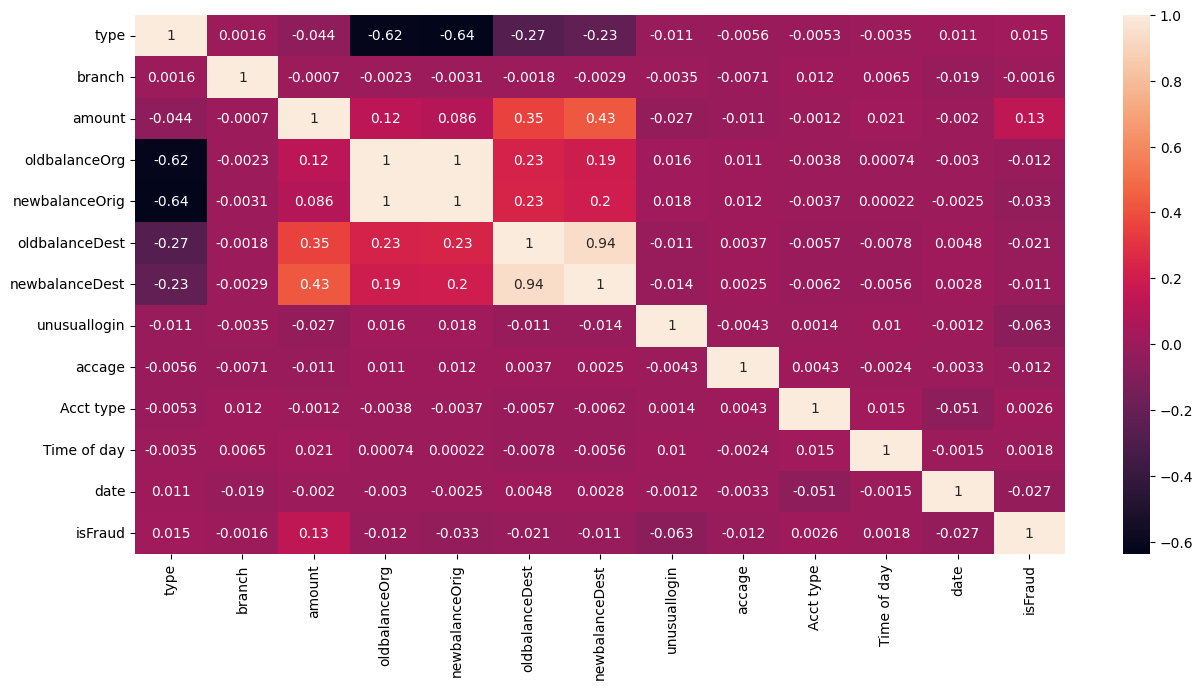

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

In [ ]:
df_encoded.head()

,type,branch,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,accage,Acct type,Time of day,date,isFraud
0,3,55,9839.64,170136.00,160296.36,0.00,0.00,9,5.90,0,1,3,0.00
1,3,54,1864.28,21249.00,19384.72,0.00,0.00,10,2.71,1,1,5,0.00
2,4,54,181.00,181.00,0.00,0.00,0.00,2,5.71,0,1,7,1.00
3,1,7,181.00,181.00,0.00,21182.00,0.00,1,6.26,0,0,6,1.00
4,3,7,11668.14,41554.00,29885.86,0.00,0.00,17,4.63,0,1,6,0.00


# Handling Data Imbalance

In [ ]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smoted, y_smoted = smote.fit_resample(X, y)

In [ ]:
X_smoted.shape

(20028, 12)

# Testing models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.3)

Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("Training")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTesting")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Training
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing
Accuracy: 0.9988350807122649
Precision: 0.9989949748743718
Recall: 0.9986604152712659
F1 Score: 0.9988276670574443


XGBoost

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("Training")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nTesting")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Training
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing
Accuracy: 0.9980029955067399
Precision: 0.9969919786096256
Recall: 0.9989953114534494
F1 Score: 0.9979926396788223


Stratified K fold - Random Forest

In [ ]:
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train_fold, y_train_fold)

    y_pred = rf_model.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred)
    recall = recall_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

    print(f"Fold Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

mean_accuracy = np.mean(accuracy_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1_score = np.mean(f1_score_list)

print("\nMean Metrics across Folds:")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-score: {mean_f1_score}")

y_pred_test = rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")

Fold Metrics - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0
Fold Metrics - Accuracy: 0.9985734664764622, Precision: 1.0, Recall: 0.9971509971509972, F1-score: 0.9985734664764622
Fold Metrics - Accuracy: 0.9971469329529244, Precision: 0.9943342776203966, Recall: 1.0, F1-score: 0.9971590909090908
Fold Metrics - Accuracy: 0.9971469329529244, Precision: 0.9971509971509972, Recall: 0.9971509971509972, F1-score: 0.9971509971509972
Fold Metrics - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0
Fold Metrics - Accuracy: 0.9957203994293866, Precision: 0.9915254237288136, Recall: 1.0, F1-score: 0.9957446808510638
Fold Metrics - Accuracy: 0.9985734664764622, Precision: 1.0, Recall: 0.9971509971509972, F1-score: 0.9985734664764622
Fold Metrics - Accuracy: 0.9942938659058488, Precision: 0.9915014164305949, Recall: 0.9971509971509972, F1-score: 0.9943181818181818
Fold Metrics - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0
Fold Metrics - Accuracy: 0.9957203994293866

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Stratified K Fold - XGBoost

In [ ]:
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    xgb_classifier_skf = xgb.XGBClassifier()
    xgb_classifier_skf.fit(X_train_fold, y_train_fold)

    y_pred = xgb_classifier_skf.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred)
    recall = recall_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

    print(f"Fold Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

mean_accuracy = np.mean(accuracy_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1_score = np.mean(f1_score_list)

print("\nMean Metrics across Folds:")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-score: {mean_f1_score}")

y_pred_test = xgb_classifier_skf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")

Fold Metrics - Accuracy: 0.9985734664764622, Precision: 0.9971590909090909, Recall: 1.0, F1-score: 0.9985775248933144
Fold Metrics - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0
Fold Metrics - Accuracy: 0.9957203994293866, Precision: 0.9915254237288136, Recall: 1.0, F1-score: 0.9957446808510638
Fold Metrics - Accuracy: 0.9985734664764622, Precision: 0.9971590909090909, Recall: 1.0, F1-score: 0.9985775248933144
Fold Metrics - Accuracy: 0.9942938659058488, Precision: 0.9915014164305949, Recall: 0.9971509971509972, F1-score: 0.9943181818181818
Fold Metrics - Accuracy: 0.992867332382311, Precision: 0.9887005649717514, Recall: 0.9971509971509972, F1-score: 0.9929078014184398
Fold Metrics - Accuracy: 0.9971469329529244, Precision: 1.0, Recall: 0.9943019943019943, F1-score: 0.9971428571428572
Fold Metrics - Accuracy: 0.9985734664764622, Precision: 1.0, Recall: 0.9971509971509972, F1-score: 0.9985734664764622
Fold Metrics - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-score: 1.0

Neural Network

In [ ]:
y1 = y.reset_index(drop=True)
X1 = X.reset_index(drop=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

i = math.floor(len(X1) * 0.3)
X_train_scaled = X_scaled[:i]
X_test_scaled = X_scaled[i:]
y1_train = y1[:i]
y1_test = y1[i:]

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X1.shape[1],)),
        Dropout(0.2),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []

for train_index, test_index in skf.split(X_train_scaled, y1_train):
    X_train_skf, X_val = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_skf, y_val = y1_train[train_index], y1_train[test_index]

    model = create_model()
    model.fit(X_train_skf, y_train_skf, epochs=10, batch_size=32, verbose=0)

    y_pred = (model.predict(X_val) > 0.5).astype("int32")

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

print("Average Accuracy:", np.mean(accuracies))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))

model = create_model()
model.fit(X_train_scaled, y1_train, epochs=10, batch_size=32, verbose=0)
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
test_accuracy = accuracy_score(y1_test, y_test_pred)
test_precision = precision_score(y1_test, y_test_pred)
test_recall = recall_score(y1_test, y_test_pred)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Epoch 1/10
86/86 [==============================] - 9s 6ms/step - loss: 0.2687 - accuracy: 0.9000
Epoch 2/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0528 - accuracy: 0.9945
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0366 - accuracy: 0.9945
Epoch 4/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.9949
Epoch 5/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.9949
Epoch 6/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0294 - accuracy: 0.9945
Epoch 7/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0298 - accuracy: 0.9945
Epoch 8/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0305 - accuracy: 0.9945
Epoch 9/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0315 - accuracy: 0.9945
Epoch 10/10
10/10 [==============================] - 0s 16ms/step
Epoch 1/10
86/86 [==============================] - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86/86 [==============================] - 3s 6ms/step - loss: 0.3570 - accuracy: 0.8578
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0526 - accuracy: 0.9949
Epoch 3/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0392 - accuracy: 0.9949
Epoch 4/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0356 - accuracy: 0.9949
Epoch 5/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9949
Epoch 6/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.9949
Epoch 7/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.9945
Epoch 8/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 0.9949
Epoch 9/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0296 - accuracy: 0.9952
Epoch 10/10
10/10 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86/86 [==============================] - 3s 8ms/step - loss: 0.2683 - accuracy: 0.9055
Epoch 2/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0534 - accuracy: 0.9945
Epoch 3/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0373 - accuracy: 0.9941
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0357 - accuracy: 0.9949
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0309 - accuracy: 0.9949
Epoch 6/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0278 - accuracy: 0.9949
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0260 - accuracy: 0.9945
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0256 - accuracy: 0.9952
Epoch 9/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9952
Epoch 10/10
10/10 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86/86 [==============================] - 3s 6ms/step - loss: 0.1671 - accuracy: 0.9600
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0426 - accuracy: 0.9941
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0375 - accuracy: 0.9945
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0372 - accuracy: 0.9945
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0379 - accuracy: 0.9949
Epoch 6/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0347 - accuracy: 0.9945
Epoch 7/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0363 - accuracy: 0.9945
Epoch 8/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0354 - accuracy: 0.9945
Epoch 9/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0333 - accuracy: 0.9945
Epoch 10/10
10/10 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
86/86 [==============================] - 3s 5ms/step - loss: 0.2192 - accuracy: 0.9368
Epoch 2/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9945
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0378 - accuracy: 0.9945
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0350 - accuracy: 0.9945
Epoch 5/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.9945
Epoch 6/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.9945
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0358 - accuracy: 0.9938
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9945
Epoch 9/10
86/86 [==============================] - 1s 10ms/step - loss: 0.0291 - accuracy: 0.9938
Epoch 10/10
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
86/86 [==============================] - 3s 6ms/step - loss: 0.3213 - accuracy: 0.8931
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0540 - accuracy: 0.9927
Epoch 3/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9938
Epoch 4/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.9941
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0321 - accuracy: 0.9949
Epoch 6/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0306 - accuracy: 0.9941
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0262 - accuracy: 0.9941
Epoch 8/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0305 - accuracy: 0.9945
Epoch 9/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0289 - accuracy: 0.9941
Epoch 10/10
10/10 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86/86 [==============================] - 3s 6ms/step - loss: 0.2293 - accuracy: 0.9192
Epoch 2/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0449 - accuracy: 0.9945
Epoch 3/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0360 - accuracy: 0.9945
Epoch 4/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0349 - accuracy: 0.9941
Epoch 5/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0293 - accuracy: 0.9938
Epoch 6/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0373 - accuracy: 0.9941
Epoch 7/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.9945
Epoch 8/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0284 - accuracy: 0.9945
Epoch 9/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.9938
Epoch 10/10
10/10 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


86/86 [==============================] - 3s 6ms/step - loss: 0.2998 - accuracy: 0.8887
Epoch 2/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0578 - accuracy: 0.9949
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0365 - accuracy: 0.9945
Epoch 4/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0373 - accuracy: 0.9949
Epoch 5/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0294 - accuracy: 0.9945
Epoch 6/10
86/86 [==============================] - 1s 8ms/step - loss: 0.0342 - accuracy: 0.9949
Epoch 7/10
86/86 [==============================] - 1s 10ms/step - loss: 0.0243 - accuracy: 0.9949
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0322 - accuracy: 0.9949
Epoch 9/10
86/86 [==============================] - 0s 6ms/step - loss: 0.0315 - accuracy: 0.9949
Epoch 10/10
10/10 [==============================] - 0s 2ms/step
Epoch 1/10
86/86 [==============================] - 3s 6ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


221/221 [==============================] - 4s 6ms/step - loss: 0.1441 - accuracy: 0.9576
Epoch 2/10
221/221 [==============================] - 2s 8ms/step - loss: 0.0461 - accuracy: 0.9926
Epoch 3/10
221/221 [==============================] - 1s 6ms/step - loss: 0.0420 - accuracy: 0.9932
Epoch 4/10
221/221 [==============================] - 1s 6ms/step - loss: 0.0373 - accuracy: 0.9926
Epoch 5/10
221/221 [==============================] - 1s 6ms/step - loss: 0.0378 - accuracy: 0.9931
Epoch 6/10
221/221 [==============================] - 2s 8ms/step - loss: 0.0341 - accuracy: 0.9929
Epoch 7/10
221/221 [==============================] - 2s 8ms/step - loss: 0.0320 - accuracy: 0.9933
Epoch 8/10
221/221 [==============================] - 1s 6ms/step - loss: 0.0316 - accuracy: 0.9928
Epoch 9/10
221/221 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9933
Epoch 10/10
221/221 [==============================] - 1s 2ms/step

Test Set Metrics:
Accuracy: 0.9930575233777

# Saving the model

In [ ]:
path = "/gdrive/MyDrive/VIT/SEM-6/xgb_final.pkl"
with open(path, 'wb') as f:
  pickle.dump(xgb_classifier_skf,f)